In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [12]:
def cat_encode(data_df, method, col, prefix):
    if (method == 1):   #label (simple) encoding
        le = preprocessing.LabelEncoder()
        data_df[col]= le.fit_transform(data_df[col].astype(str))
    elif (method == 2): #one-hot encoding
        dummies_df  = pd.get_dummies(data_df[col].astype(str), prefix=prefix)        
        data_df = data_df.join(dummies_df)
    
    return data_df

def errtest2(q,x_test,p):
    y_predict = q.predict(x_test)
    p=p/100

    aa=0
    for i in range(len(y_predict)) :
        if (y_predict[i]<=(1+p)*y_test[i]) and (y_predict[i]>=(1-p)*y_test[i]) :
            aa+=1
        else:
            pass
    return('the pracent of your righat %s gests is %d' %(q,100*aa/len(y_predict)))

def mew_culom(df,name,val):
    data_list=[]
    for i in df[name]:
        if val in str(i):
            data_list.append(1)
        else:
            data_list.append(0)
    return data_list


def mew_culomlist(df,name):
    df=df.tolist()
    data_list=np.zeros(len(df))
    for i in range(len(df)):
        for j in name:
            if j in str(df[i]):
                data_list[i]+=1
            else:
                pass
    return data_list

def mavyVal(data,name):
    listVal=[]
    for i in data[name]:
        if i in listVal:
            pass
        else:
            listVal.append(i)
    return listVal

def numList(data,name,listVal):
    listNum=[]
    for i in listVal:
        num=0
        for j in data[name]:
            if i==j:
                num+=1
        listNum.append(num)
    return listNum
        
def plor_bar(df,name):
    
    
    # labels for bars
    tick_label =mavyVal(df,name)
    
    # heights of bars
    height = numList(df,name,tick_label )
    
    # x-coordinates of left sides of bars 
    left = range(1,len(height)+1)


    

    # plotting a bar chart
    plt.figure(figsize=(15,7.5))
    
    
    plt.bar(left, height, tick_label = tick_label,width = 1,color = ['red', 'green'])
    plt.tick_params(axis='x', rotation=90,labelsize=20)
    plt.tick_params(axis='y', labelsize=10)
    ''''
    # naming the x-axis
    plt.xlabel('x - axis')
    # naming the y-axis
    plt.ylabel('y - axis')
    # plot title
    plt.title('My bar chart!')
    '''
    # function to show the plot
    plt.show()       

In [50]:
df=pd.read_csv('vehicles.csv')

In [51]:
df.drop('id', inplace=True, axis=1)
df.drop('url', inplace=True, axis=1)
df.drop('region_url', inplace=True, axis=1)
df.drop('region', inplace=True, axis=1)
df.drop('county', inplace=True, axis=1)
df=df.drop(columns=['lat','long'])


df['sport']=mew_culom(df,'model','sport')
df['4x4']=mew_culom(df,'model','4x4')

df['model_l']=df['sport']+df['4x4']


df.drop('4x4', inplace=True, axis=1)
df.drop('sport', inplace=True, axis=1)

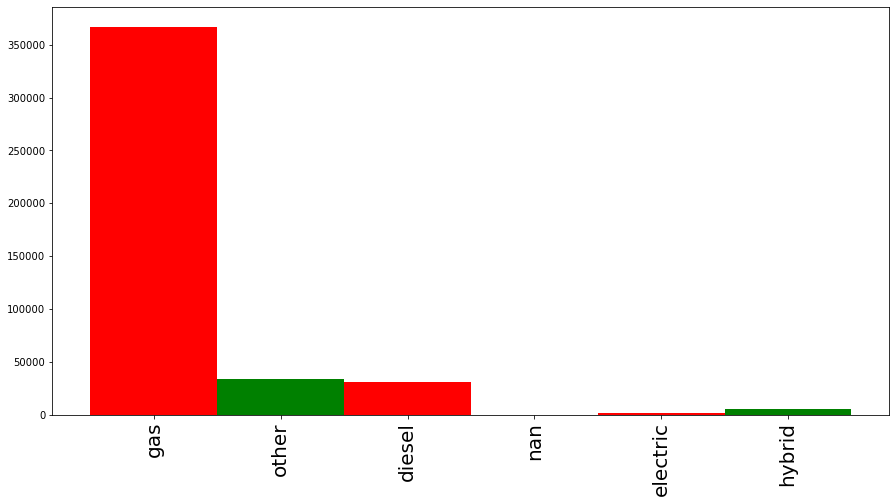

In [52]:
plor_bar(df,'fuel')


In [53]:
df=cat_encode(df,2,'cylinders','cyl')
#cat_encode(df,1,'manufacturer',1)
df=cat_encode(df,2,'paint_color','paint')
df=cat_encode(df,2,'condition','cond')
cat_encode(df,1,'transmission','trans')
df=cat_encode(df,2,'fuel','fuel')
df=cat_encode(df,2,'title_status','tit')
cat_encode(df,1,'type','type')
df=cat_encode(df,2,'size','size')
cat_encode(df,1,'model',1)
#cat_encode(df,1,'state',1)






,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,...,tit_missing,tit_nan,tit_parts only,tit_rebuilt,tit_salvage,size_compact,size_full-size,size_mid-size,size_nan,size_sub-compact
0,9500,2003.0,chrysler,27589,excellent,6 cylinders,gas,30376.0,clean,0,...,0,0,0,0,0,0,0,1,0,0
1,28990,2018.0,gmc,7818,good,6 cylinders,gas,20736.0,clean,3,...,0,0,0,0,0,0,0,0,1,0
2,16590,2013.0,lincoln,20462,good,NaN,gas,61087.0,clean,3,...,0,0,0,0,0,0,0,0,1,0
3,28990,2017.0,gmc,7834,good,6 cylinders,gas,18041.0,clean,3,...,0,0,0,0,0,0,0,0,1,0
4,20590,2017.0,lincoln,20451,good,NaN,gas,36436.0,clean,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441391,23590,2017.0,infiniti,22758,good,6 cylinders,gas,25738.0,clean,0,...,0,0,0,0,0,0,0,0,1,0
441392,16990,2017.0,buick,23287,good,NaN,gas,36688.0,clean,3,...,0,0,0,0,0,0,0,0,1,0
441393,21590,2013.0,bmw,3373,good,NaN,other,44366.0,clean,0,...,0,0,0,0,0,0,0,0,1,0
441394,26990,2016.0,bmw,3089,good,NaN,other,43934.0,clean,3,...,0,0,0,0,0,0,0,0,1,0


In [55]:
df['paint_colers']=df['paint_nan']+df['paint_blue']+df['paint_brown']+df['paint_custom']+df['paint_green']+df['paint_purple']+df['paint_red']+df['paint_yellow']+df['paint_orange']+2*(df['paint_silver']+df['paint_grey']+df['paint_black'])+3*(df['paint_white'])


df['cyl_smol']=df['cyl_3 cylinders']+df['cyl_4 cylinders']+df['cyl_5 cylinders']

df['cyl_big']=df['cyl_8 cylinders']+df['cyl_10 cylinders']+df['cyl_12 cylinders']

df['cond_n']=df['cond_like new']+df['cond_new'] + df['cond_excellent']
df['cond_l']=df['cond_fair']+df['cond_salvage'] + df['cond_good']

df['fuel_o']=df['fuel_electric']+df['fuel_hybrid']+df['fuel_other']

df['tit_s']=df['tit_salvage']+df['tit_rebuilt']+df['tit_parts only']+df['tit_nan']+df['tit_missing']+df['tit_lien']




df['size_compact']=df['size_compact']+df['size_sub-compact']

In [56]:

df.drop('state', inplace=True, axis=1)
df.drop('VIN', inplace=True, axis=1)
df.drop('drive', inplace=True, axis=1)
df.drop('image_url', inplace=True, axis=1)
df.drop('description', inplace=True, axis=1)
df=df.drop(columns=['paint_color','paint_blue','paint_brown','paint_custom','paint_green','paint_purple','paint_red','paint_yellow','paint_silver' ,'paint_black','paint_grey','paint_orange','paint_white','paint_nan'])
df=df.drop(columns=['cyl_3 cylinders','cyl_4 cylinders','cyl_5 cylinders','cyl_8 cylinders','cyl_10 cylinders','cyl_12 cylinders','cyl_nan','cylinders'])
df=df.drop(columns=['cond_fair','cond_salvage','cond_new','cond_like new','condition'])
df=df.drop(columns=['fuel_electric','fuel_hybrid','fuel_other','fuel_nan','fuel'])
df=df.drop(columns=['tit_salvage','tit_rebuilt','tit_parts only','tit_nan','tit_missing','tit_lien','title_status'])
df=df.drop(columns=['size_sub-compact','size_nan','size','manufacturer','cond_excellent','cond_good'])




In [57]:

df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436034 entries, 0 to 441395
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   price            436034 non-null  int64  
 1   year             436034 non-null  float64
 2   model            436034 non-null  int64  
 3   odometer         436034 non-null  float64
 4   transmission     436034 non-null  int64  
 5   type             436034 non-null  int64  
 6   model_l          436034 non-null  int64  
 7   cyl_6 cylinders  436034 non-null  uint8  
 8   cyl_other        436034 non-null  uint8  
 9   cond_nan         436034 non-null  uint8  
 10  fuel_diesel      436034 non-null  uint8  
 11  fuel_gas         436034 non-null  uint8  
 12  tit_clean        436034 non-null  uint8  
 13  size_compact     436034 non-null  uint8  
 14  size_full-size   436034 non-null  uint8  
 15  size_mid-size    436034 non-null  uint8  
 16  paint_colers     436034 non-null  uint

<AxesSubplot:>

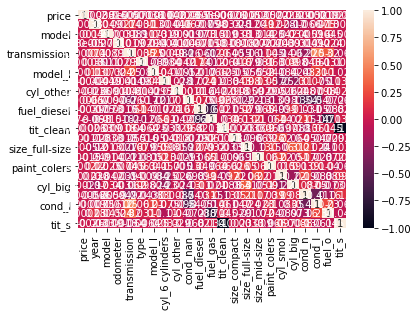

In [59]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)


In [60]:

y=df[['price']]
x=df.drop(columns=['price'])

y=np.ravel(y)

print(x,y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

          year  model  odometer  transmission  type  model_l  cyl_6 cylinders  \
0       2003.0  27589   30376.0             0     5        0                1   
1       2018.0   7818   20736.0             3     8        1                1   
2       2013.0  20462   61087.0             3    10        0                0   
3       2017.0   7834   18041.0             3     8        1                1   
4       2017.0  20451   36436.0             3    10        0                0   
...        ...    ...       ...           ...   ...      ...              ...   
441391  2017.0  22758   25738.0             0     4        1                1   
441392  2017.0  23287   36688.0             3    10        1                0   
441393  2013.0   3373   44366.0             0    10        0                0   
441394  2016.0   3089   43934.0             3     3        0                0   
441395  2018.0  13493   33104.0             0     0        1                0   

        cyl_other  cond_nan

In [61]:
cf=KNeighborsClassifier(n_neighbors = 1)
cf.fit(x_train, y_train)
print(cf.score(x_test, y_test))


0.4990339977205126


In [ ]:
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(x_train, y_train)
print(tree.score(x_test, y_test))

In [63]:
print(errtest2(cf,x_test,10))
print(errtest2(tree,x_test,10))

the pracent of your righat KNeighborsClassifier(n_neighbors=1) gests is 57
the pracent of your righat DecisionTreeClassifier(max_depth=20) gests is 32
